In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv("./YOLOv7_training/compiled_test_results.csv")
list(df.columns.values)

['run',
 'set',
 'all',
 'duplex',
 'quad',
 'conf',
 'labels',
 'P',
 'R',
 'mAP@.5',
 'mAP@.5:.95']

In [175]:
def make_barplots(df, title):

    fig, ax = plt.subplots(1, 3, figsize=(13, 3))

    labels = list(df.run.values)
    columns = ["P", "R", "mAP@.5"]
    titles = ["Precision", "Recall", "mAP@.5"]

    # use different colorschemes for different classes
    if df["all"].mean() == 1:
        colors = plt.cm.GnBu(np.linspace(0, 0.8, len(labels)))
    elif df["duplex"].mean() == 1:
        colors = plt.cm.OrRd(np.linspace(0, 0.8, len(labels)))
    elif df["quad"].mean() == 1:
        colors = plt.cm.RdPu(np.linspace(0, 0.8, len(labels)))

    for i, col in enumerate(columns):
        for j, row in enumerate(df.index):
            ax[i].bar(j, df.loc[row, col], color=colors[j], edgecolor="black")
            ax[i].annotate(df.loc[row, col], (j, df.loc[row, col]), (j-0.35, df.loc[row, col]-0.06), fontsize=10)

        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if i==0:
            ax[i].set_ylabel('Value')
            ax[i].set_yticks(np.linspace(0, 1, 11))
        
        ax[i].set_ylim([0, 1])
        ax[i].set_title(titles[i])

    # Create a legend
    fig.legend(labels, loc='lower center', ncol=len(labels))
    fig.suptitle(title, x=0.15, y=0.995)
    plt.subplots_adjust(bottom=0.1, top=0.82)

    # Show the plot
    plt.show()

### Plot results for all classes, test set 1 & 2 

In [177]:
dfmod = df[(df["set"]==1) & (df["all"]==1)]
dfmod = dfmod.iloc[1:,:]
dfmod

,run,set,all,duplex,quad,conf,labels,P,R,mAP@.5,mAP@.5:.95
3,b2,1,1,0,0,0.2,141,0.969,0.907,0.920,0.707
9,b3,1,1,0,0,0.2,141,0.999,1.000,0.999,0.877
15,b4,1,1,0,0,0.2,141,0.970,0.928,0.951,0.769
21,z1,1,1,0,0,0.2,141,0.904,0.882,0.865,0.519
27,z2,1,1,0,0,0.2,141,0.939,0.945,0.939,0.568


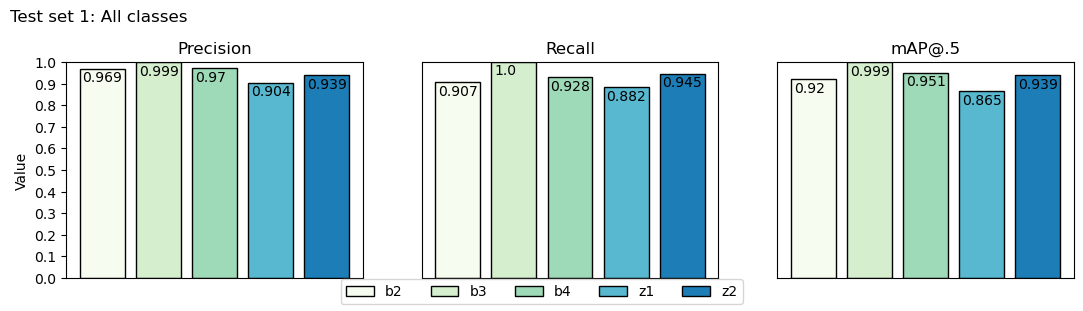

In [178]:
make_barplots(dfmod, "Test set 1: All classes")

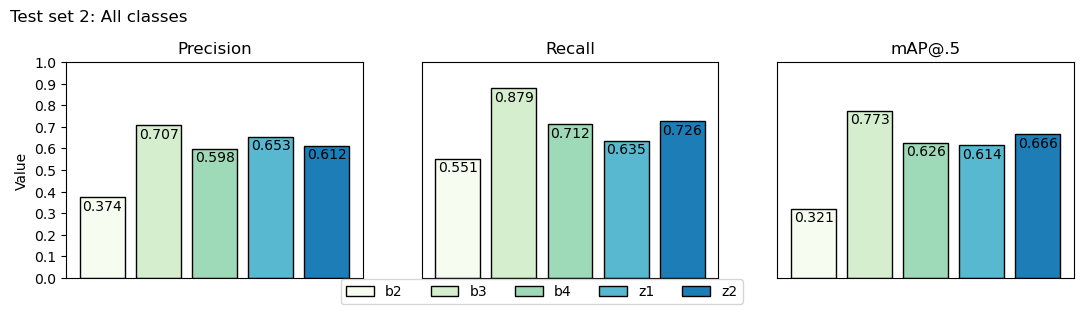

In [179]:
dfmod = df[(df["set"]==2) & (df["all"]==1)]
make_barplots(dfmod, "Test set 2: All classes")

### Plot results for duplex, test set 1 & 2 

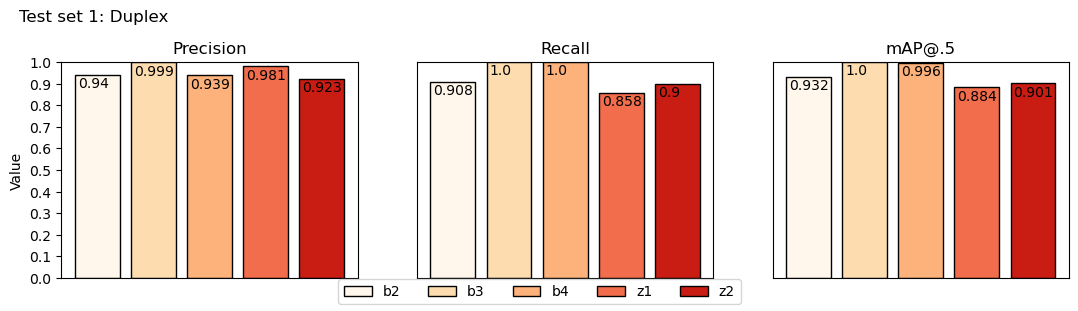

In [180]:
dfmod = df[(df["set"]==1) & (df["duplex"]==1)]
dfmod = dfmod.iloc[1:,:]
make_barplots(dfmod, "Test set 1: Duplex")


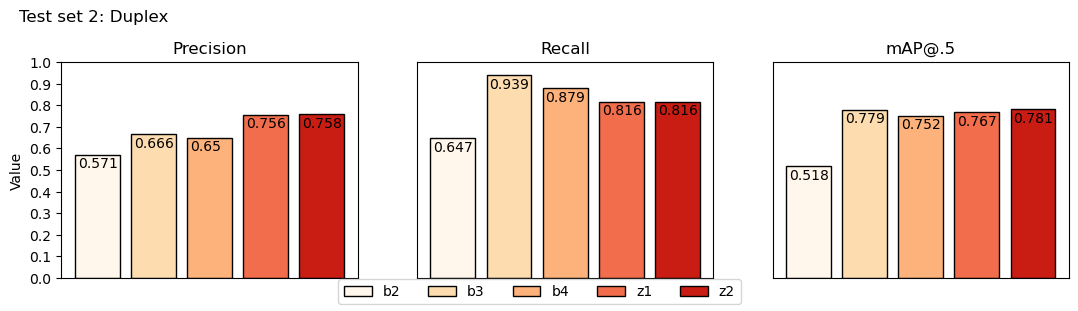

In [181]:
dfmod = df[(df["set"]==2) & (df["duplex"]==1)]
make_barplots(dfmod, "Test set 2: Duplex")

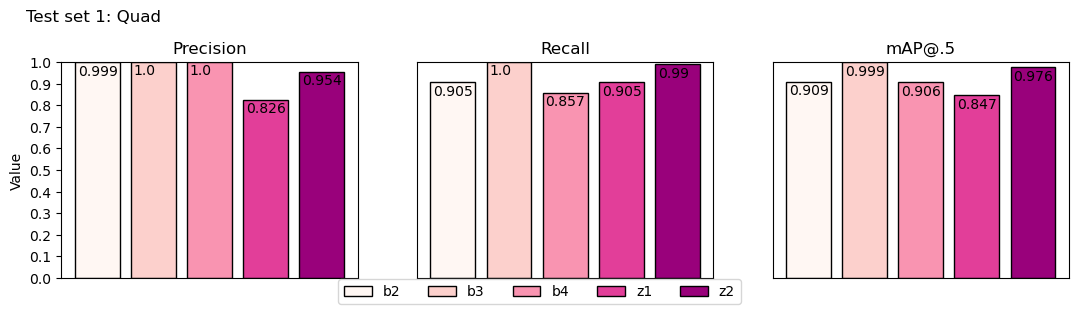

In [182]:
dfmod = df[(df["set"]==1) & (df["quad"]==1)]
dfmod = dfmod.iloc[1:,:]
make_barplots(dfmod, "Test set 1: Quad")

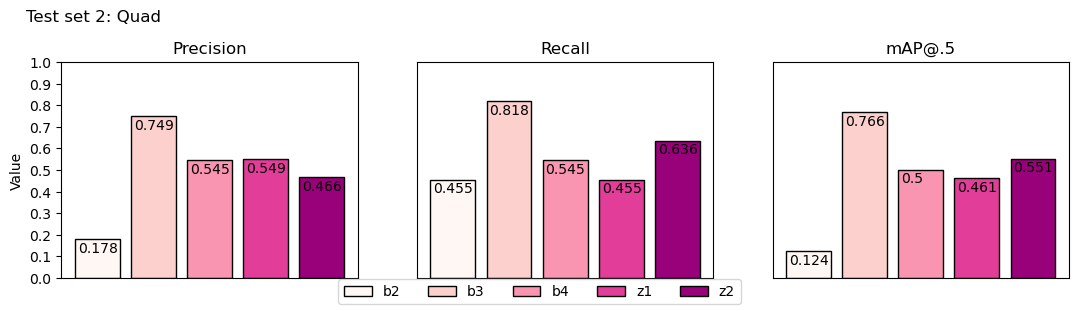

In [183]:
dfmod = df[(df["set"]==2) & (df["quad"]==1)]
make_barplots(dfmod, "Test set 2: Quad")